In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import opinion_lexicon
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from PIL import Image
import numpy as np

plt.style.use('ggplot')


In [4]:
df = pd.read_csv('./data/B09G9FPHY6_2023-12-01.csv')
df.shape

(336, 10)

# Positive Score Graph

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\3482723118.py:5: UserWarning: The palette list has more values (144) than needed (74), which may not be intended.
  sns.barplot(x='date', y='score', data=positive_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(positive_score)))


Figure(2000x400)
Figure(2000x400)


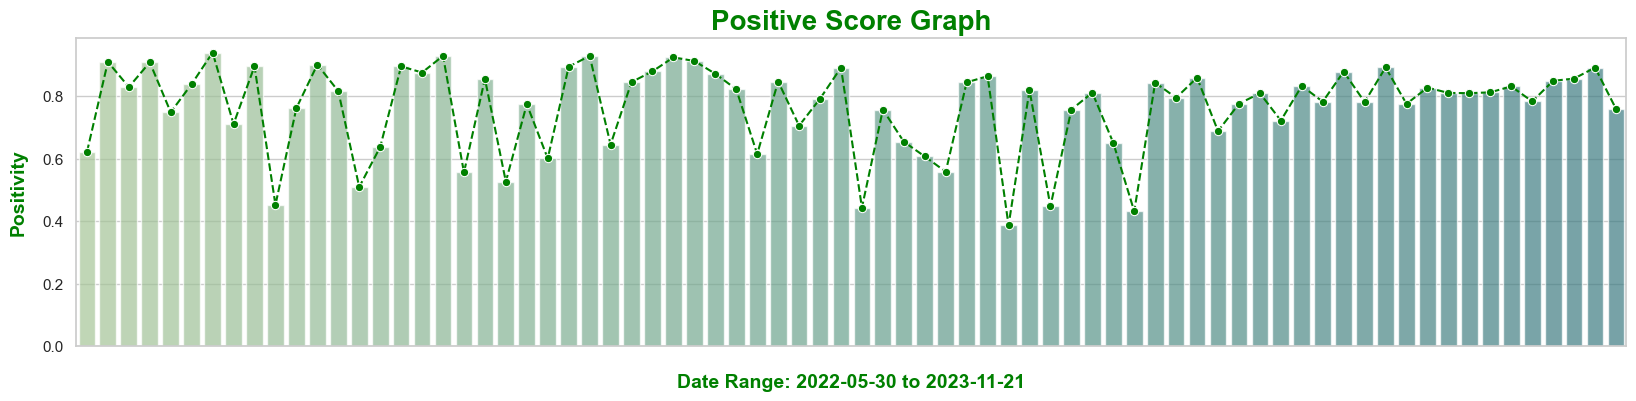

In [5]:
positive_score = df.loc[df['label'] == 'positive', ['date', 'score']]
fig = plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
sns.lineplot(x='date', y='score', data=positive_score, color='green', errorbar=None,  linestyle='--', marker='o')
sns.barplot(x='date', y='score', data=positive_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(positive_score)))
plt.xlabel('Date Range: ' + str(positive_score['date'].min()) + ' to ' + str(positive_score['date'].max()), fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Positivity',fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Positive Score Graph', fontsize=20, color='green', fontweight='bold' )
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
# plt.show()
print(fig)
l = list()
l.append(fig)
print(l[0])

# Negative Score Graph

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\2682139042.py:5: UserWarning: The palette list has more values (161) than needed (124), which may not be intended.
  sns.barplot(x='date', y='score', data=negative_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(negative_score)))


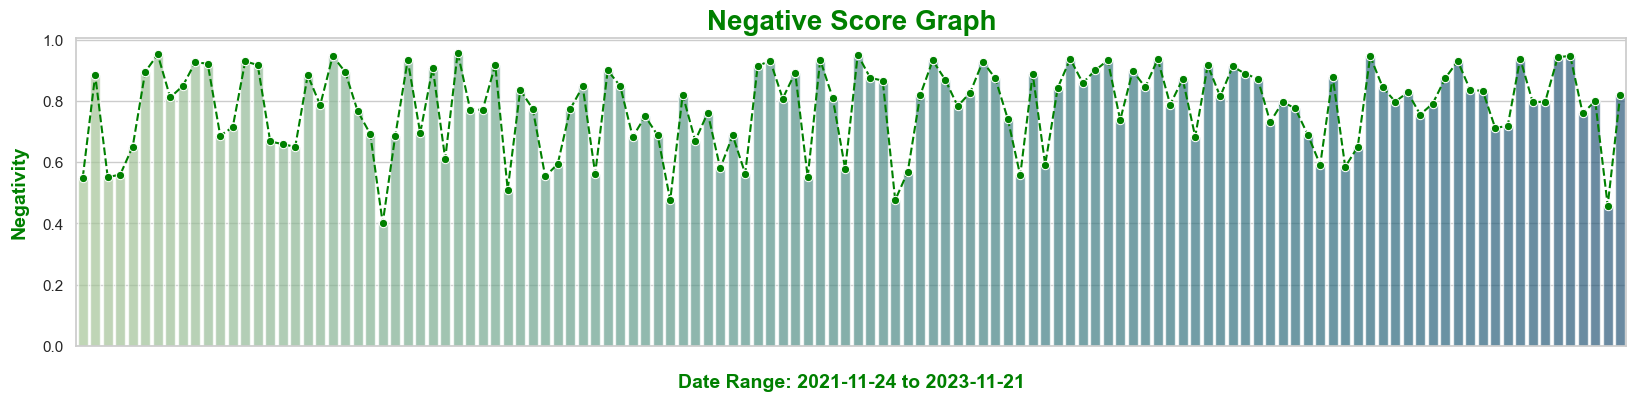

In [6]:
negative_score = df.loc[df['label'] == 'negative', ['date', 'score']]
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
sns.lineplot(x='date', y='score', data=negative_score, color='green', errorbar=None,  linestyle='--', marker='o')
sns.barplot(x='date', y='score', data=negative_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(negative_score)))
plt.xlabel('Date Range: ' + str(negative_score['date'].min()) + ' to ' + str(negative_score['date'].max()), fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Negativity',fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Negative Score Graph', fontsize=20, color='green', fontweight='bold' )
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])

# plt.show()
plt.savefig('analysis.png')

# Rating vs Date

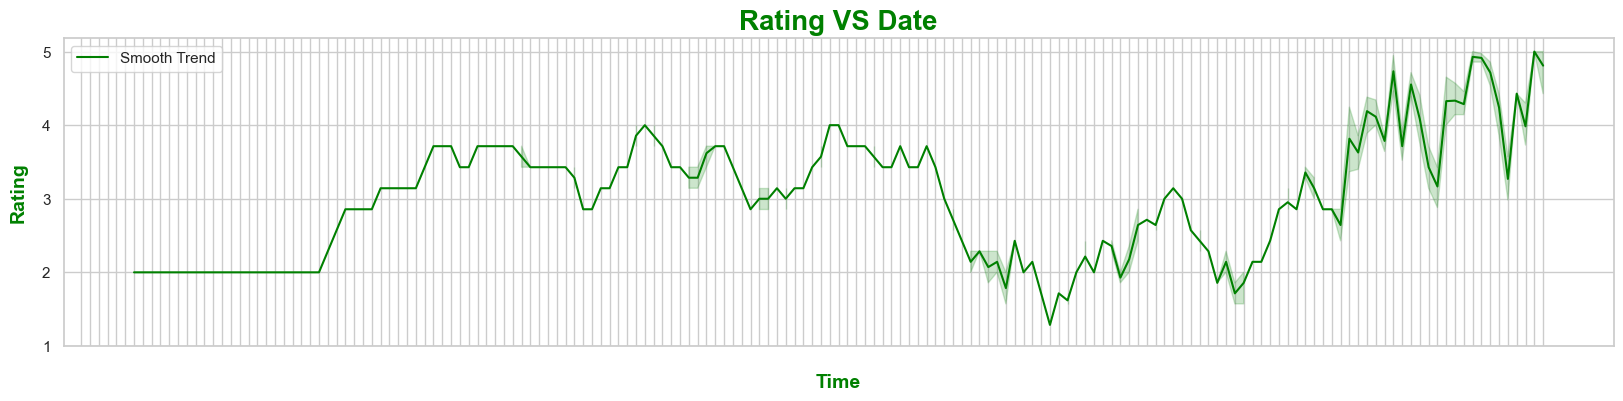

In [39]:
ratingVSdate = df[['date', 'rating']]
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")

# Calculate the rolling mean of ratings
rolling_mean = ratingVSdate['rating'].rolling(window=7).mean()

# Plot the rolling mean as a smooth trend line
sns.lineplot(x='date', y=rolling_mean, data=ratingVSdate, color='green', label='Smooth Trend')

plt.xlabel('Time', fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Rating', fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Rating VS Date', fontsize=20, color='green', fontweight='bold')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
plt.yticks([1, 2, 3, 4, 5])
plt.show()

# Top Reviews 

In [8]:
Top_positive_review = df.loc[(df['label'] == 'positive') & (df['rating'] == 5.0)]
Top_positive_review.sort_values(by='score', ascending=False, inplace=True)
Top_positive_review = Top_positive_review [['date', 'title','text', 'location' ]]
Top_positive_review.head(10)

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\4291683660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_positive_review.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,location
330,2023-11-20,Works great!!,Works great! Got as a late birthday gift for m...,the United States
296,2023-11-15,Great,So far so good!!! Love this iPad. The kiddos l...,the United States
325,2023-11-19,Great,Me encantó y es mi primer IPad. Lo amé y funci...,the United States
293,2023-11-14,Beautiful,The screen is beautiful. The connection to my ...,the United States
228,2023-11-03,Love my IPad!,This version is a welcome upgrade for me from ...,the United States
234,2023-11-04,Mom loves it,Got as a gift for my mom… she loves it!!,the United States
202,2023-10-30,Excellent,Excellent Product. 100% recommendable. AAA!!,the United States
327,2023-11-20,I pad,"Works great, easy to use. Love it",the United States
272,2023-11-10,Perfect!!!!,I received my iPad brand new and in perfect co...,the United States
206,2023-10-30,Perfect,Perrrrrfect. Fully functional & great iPad. Hi...,the United States


In [9]:
Top_negative_review = df.loc[(df['label'] == 'negative') & (df['rating'] == 1.0)]
Top_negative_review.sort_values(by='score', ascending=False, inplace=True)
Top_negative_review = Top_negative_review [['date', 'title','text', 'location' ]]
Top_negative_review.head(10)

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\3710467704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_negative_review.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,location
218,2023-11-01,Broke in a month,Incredibly disappointed in this refurbished iP...,the United States
180,2023-10-15,Buy the insurance,I bought this in April 2023. It just froze and...,the United States
304,2023-11-16,Broken screen received,Product received completely broken. iPad scree...,the United States
299,2023-11-15,This iPad crashes consistently.,I use this predominantly for reading the news....,the United States
158,2023-10-02,No IMEI # 🤬🤬,"This product is crap, has no IMEI # so you can...",the United States
144,2023-09-20,Freezes and restarts,I’m so disappointed with this purchase. After ...,the United States
169,2023-10-10,This iPad is defected cracked screen I didn’t ...,The screen was cracked a little when I got it ...,the United States
265,2023-11-08,iPad died in less than 3 months,iPad worked fine at first. Less than 3 months ...,the United States
153,2023-09-28,Came damaged inside shipping box,iPad came damaged inside shipping box. And to ...,the United States
123,2023-09-04,Don’t waste your money. Especially if you have...,Too many unnecessary bells and whistles that a...,the United States


# Critcal Reviews

In [10]:
Critical_Positive = df.loc[(df['label'] == 'positive')]
Critical_Positive.sort_values(by='score', ascending=False, inplace=True)
Critical_Positive = Critical_Positive [['date', 'title','text', 'rating', 'location' ]]
Critical_Positive.head(1)

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\617918925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Critical_Positive.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,rating,location
330,2023-11-20,Works great!!,Works great! Got as a late birthday gift for m...,5.0,the United States


In [11]:
Critical_Negative = df.loc[(df['label'] == 'negative')]
Critical_Negative.sort_values(by='score', ascending=False, inplace=True)
Critical_Negative = Critical_Negative [['date', 'title','text', 'rating', 'location' ]]
Critical_Negative.head(1)

C:\Users\subha\AppData\Local\Temp\ipykernel_16644\2858012145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Critical_Negative.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,rating,location
39,2023-03-18,Customer Servied after price reduction,The Ipad itself is very good. My issue is cus...,2.0,the United States


# Word Cloud

In [12]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('opinion_lexicon')


In [13]:
wordcloud = WordCloud(max_font_size = 50, max_words = 1000)

In [14]:
positive_reviews = df.loc[df['label'] == 'positive', ['translated_text']]
negative_reviews = df.loc[df['label'] == 'negative', ['translated_text']]

In [15]:
positive_reviews_list = df.loc[df['label'] == 'positive', ['translated_text']]['translated_text'].tolist()
word= []
for i in positive_reviews_list:
    word.append(word_tokenize(i.lower()))
word_list = [i for sublist in word for i in sublist]
stop_words = set()
stemmer = set()
stop_words.update(stopwords.words('english'))
stemmer = SnowballStemmer('english')

filtered_words = []

for word in word_list: 
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

positive_words = set(opinion_lexicon.positive())

positive_word_list = [word for word in filtered_words if word in positive_words]


text = ' '.join(positive_word_list)

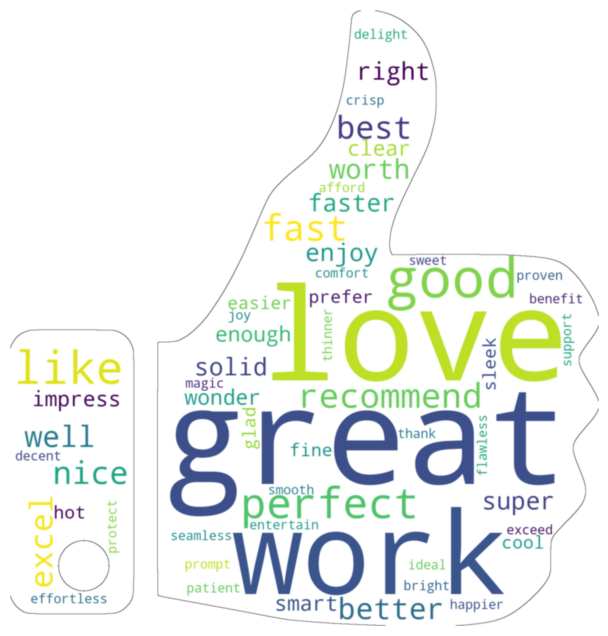

In [16]:
THUMBS_UP_FILE = './Images/thumbs-up.png'
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color=(255,255,255))
image_mask.paste(icon, box = icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(stopwords=stop_words, mask = rgb_array, background_color='white',contour_width=1, contour_color='black',
                        colormap='viridis')
word_cloud.generate(text)

plt.figure(figsize=([8, 8]))

plt.imshow(word_cloud, interpolation='bicubic')
plt.axis('off')
plt.show()

In [17]:
negative_reviews_list = df.loc[df['label'] == 'negative', ['translated_text']]['translated_text'].tolist()
word= []
for i in negative_reviews_list:
    word.append(word_tokenize(i.lower()))
word_list = [i for sublist in word for i in sublist]
stop_words = set()
stemmer = set()
stop_words.update(stopwords.words('english'))
stemmer = SnowballStemmer('english')

filtered_words = []

for word in word_list: 
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

negative_words = set(opinion_lexicon.negative())

negative_word_list = [word for word in filtered_words if word in negative_words]

text_negative = ' '.join(negative_word_list)

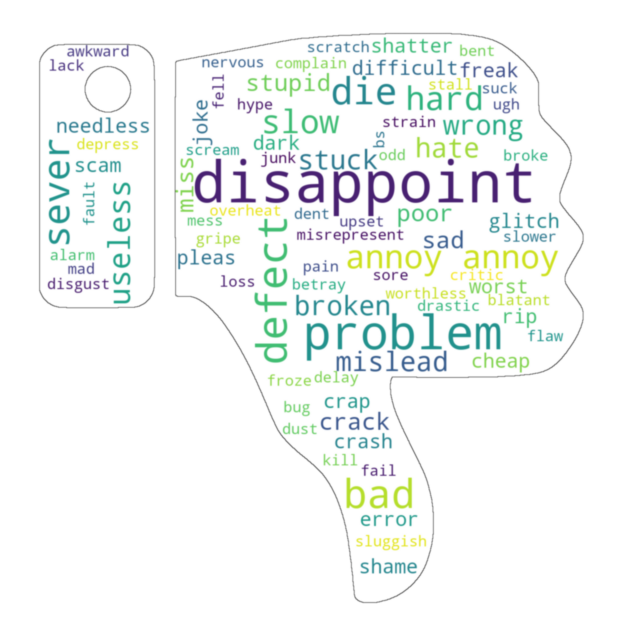

In [18]:
THUMBS_DOWN_FILE = './Images/thumbs-down.png'
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color=(255,255,255))
image_mask.paste(icon, box = icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, background_color='white',contour_width=1, contour_color='black',
                      colormap='viridis')
word_cloud.generate(text_negative)

plt.figure(figsize=([8, 8]))

plt.imshow(word_cloud, interpolation='bicubic')
plt.axis('off')
plt.show()